In [1]:
import ROOT
import numpy as np
from array import array

pT  = array('f', [0.0])
eta = array('f', [0.0])
phi = array('f', [0.0])


f = ROOT.TFile('toy-dataset.root', 'RECREATE')
t = ROOT.TTree('myTree', 'myTree')
t.Branch('pT',  pT,  'pT/F')
t.Branch('eta', eta, 'eta/F')
t.Branch('phi', phi, 'phi/F')

for i in range(10000):
    pT[0] = np.random.chisquare(4)*10.0
    eta[0] = np.random.normal(0, 2)
    phi[0] = np.random.uniform(-np.pi, np.pi)

    if abs(eta[0]) > 5.0:
        continue
    else:
        t.Fill()

t.Write()
f.Close()

Welcome to JupyROOT 6.30/02


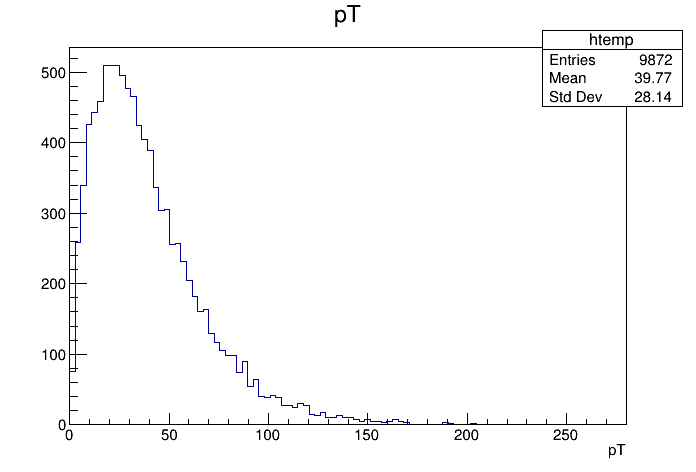

In [8]:
f = ROOT.TFile("toy-dataset.root", "READ")
c1 = ROOT.TCanvas()
t = f.Get("myTree")
t.Draw("pT")
c1.Draw()

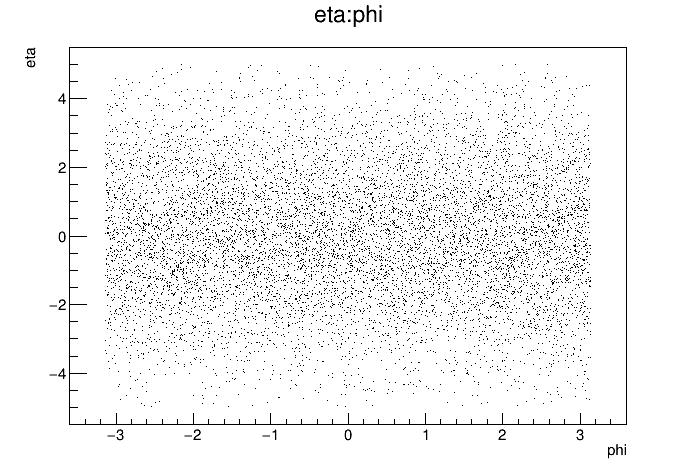

In [16]:
t.Draw("pT", "abs(eta) < 2.5")
c1.Draw()

In [17]:
t.Draw("eta:phi")
c1.Update
c1.Draw()

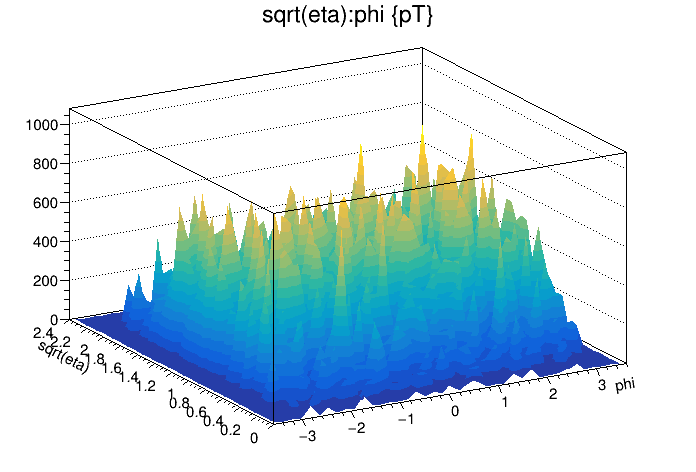

In [18]:
t.Draw("sqrt(eta):phi", "pT", "surf2")
c1.Draw()

Warning in <TFile::Append>: Replacing existing TH1: hist1 (Potential memory leak).


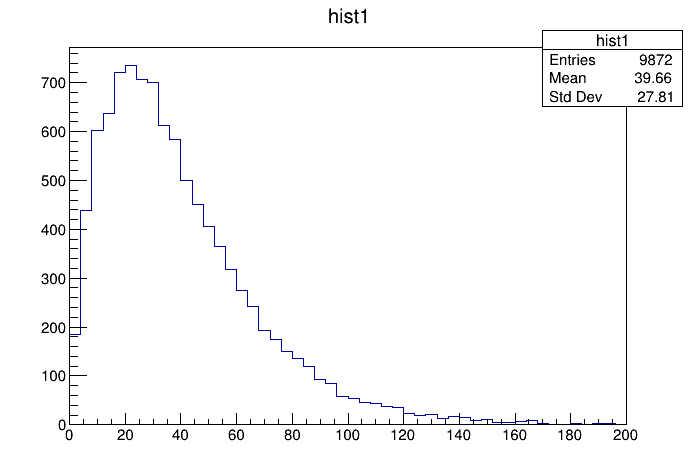

In [20]:
myHisto = ROOT.TH1F("hist1", "hist1", 50, 0, 200)
t.Draw("pT>>hist1")
c1.Draw()

In [22]:
myHisto.SetStats(0)
myHisto.SetLineColor(ROOT.kRed)
myHisto.SetLineWidth(4)
myHisto.SetFillColor(ROOT.kCyan)

c = ROOT.TCanvas()
myHisto.Draw("hist")
c.SaveAs("ttree-draw-output.png")


Info in <TCanvas::Print>: png file ttree-draw-output.png has been created
